In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [8]:
df=pd.read_csv('/Users/sundaylai/Python_Class/git-intro/MFE/UCB-MFE-python-preprogram/hw3.csv')

In [9]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [10]:
df.dtypes

ts            object
open         float64
high         float64
low          float64
close        float64
volume       float64
volumeUSD    float64
token         object
chain         object
dtype: object

In [11]:
df.count()

ts           2667
open         2667
high         2163
low          2378
close        2531
volume       2667
volumeUSD       0
token        2667
chain        2667
dtype: int64

In [13]:
df['token'].unique()

array(['UNI', 'CRV', 'SOL', 'ETH', 'AAVE', 'USDT', 'COMP', 'BTC',
       '<span name="tokenName">UNI</span>',
       '<span name="tokenName">CRV</span>',
       '<span name="tokenName">SOL</span>',
       '<span name="tokenName">USDT</span>',
       '<span name="tokenName">COMP</span>',
       '<span name="tokenName">AAVE</span>',
       '<span name="tokenName">ETH</span>',
       '<span name="tokenName">BTC</span>'], dtype=object)

In [14]:
df['chain'].unique()

array(['ETH', 'SOL', 'USDT', 'BTC'], dtype=object)

In [15]:
chain = df['chain'].unique()

In [17]:
df[['token','chain']].drop_duplicates()

,token,chain
0,UNI,ETH
1,CRV,ETH
2,SOL,SOL
3,ETH,ETH
6,AAVE,ETH
7,USDT,USDT
16,COMP,ETH
20,BTC,BTC
45,"<span name=""tokenName"">UNI</span>",ETH
71,"<span name=""tokenName"">CRV</span>",ETH


In [19]:
df.duplicated().sum()

307

In [60]:
clean = df.copy()
clean['token']=clean['token'].str.extract('<span name="tokenName">(.*?)</span>')
clean[['token','chain']].drop_duplicates()

,token,chain
0,NaN,ETH
2,NaN,SOL
7,NaN,USDT
20,NaN,BTC
45,UNI,ETH
71,CRV,ETH
79,SOL,SOL
114,USDT,USDT
144,COMP,ETH
152,AAVE,ETH


In [61]:
clean['token'].unique()

array([nan, 'UNI', 'CRV', 'SOL', 'USDT', 'COMP', 'AAVE', 'ETH', 'BTC'],
      dtype=object)

In [75]:
clean=clean.dropna(subset=['token'])

In [76]:
clean['token'].unique()

array(['UNI', 'CRV', 'SOL', 'USDT', 'COMP', 'AAVE', 'ETH', 'BTC'],
      dtype=object)

In [77]:
clean.duplicated().sum()

17

In [78]:
clean['token'].unique()

array(['UNI', 'CRV', 'SOL', 'USDT', 'COMP', 'AAVE', 'ETH', 'BTC'],
      dtype=object)

In [79]:
clean=clean.drop_duplicates()

In [80]:
clean.duplicated().sum()

0

In [93]:
clean

,ts,open,high,low,close,volume,volumeUSD,token,chain
45,2021-12-12 00:00:00,15.7500,15.9400,15.6600,15.9000,5.216690e+04,8.294537e+05,UNI,ETH
71,2021-12-10 21:00:00,3.4600,3.5100,3.4600,3.4850,1.080245e+05,3.764653e+05,CRV,ETH
79,2021-12-02 10:00:00,228.2580,229.8900,226.6400,227.4800,1.973926e+04,4.490287e+06,SOL,SOL
108,2021-12-06 02:00:00,3.5734,3.8495,3.5462,3.8113,7.878865e+05,3.002872e+06,CRV,ETH
114,2021-12-11 02:00:00,1.0004,1.0004,1.0002,1.0003,2.546324e+06,2.547087e+06,USDT,USDT
...,...,...,...,...,...,...,...,...,...
2531,2021-12-13 00:00:00,4156.8400,NaN,4127.4000,4132.9200,5.090836e+03,2.104002e+07,ETH,ETH
2533,2021-12-07 14:00:00,4365.0400,4382.6700,4337.3200,4346.1400,7.326422e+03,3.184166e+07,ETH,ETH
2556,2021-12-12 10:00:00,168.7200,169.7200,NaN,168.2300,1.054539e+04,1.774051e+06,SOL,SOL
2591,2021-12-02 16:00:00,4.9039,4.9354,4.6896,4.7747,2.291365e+05,1.094058e+06,CRV,ETH


In [81]:
len(clean)

133

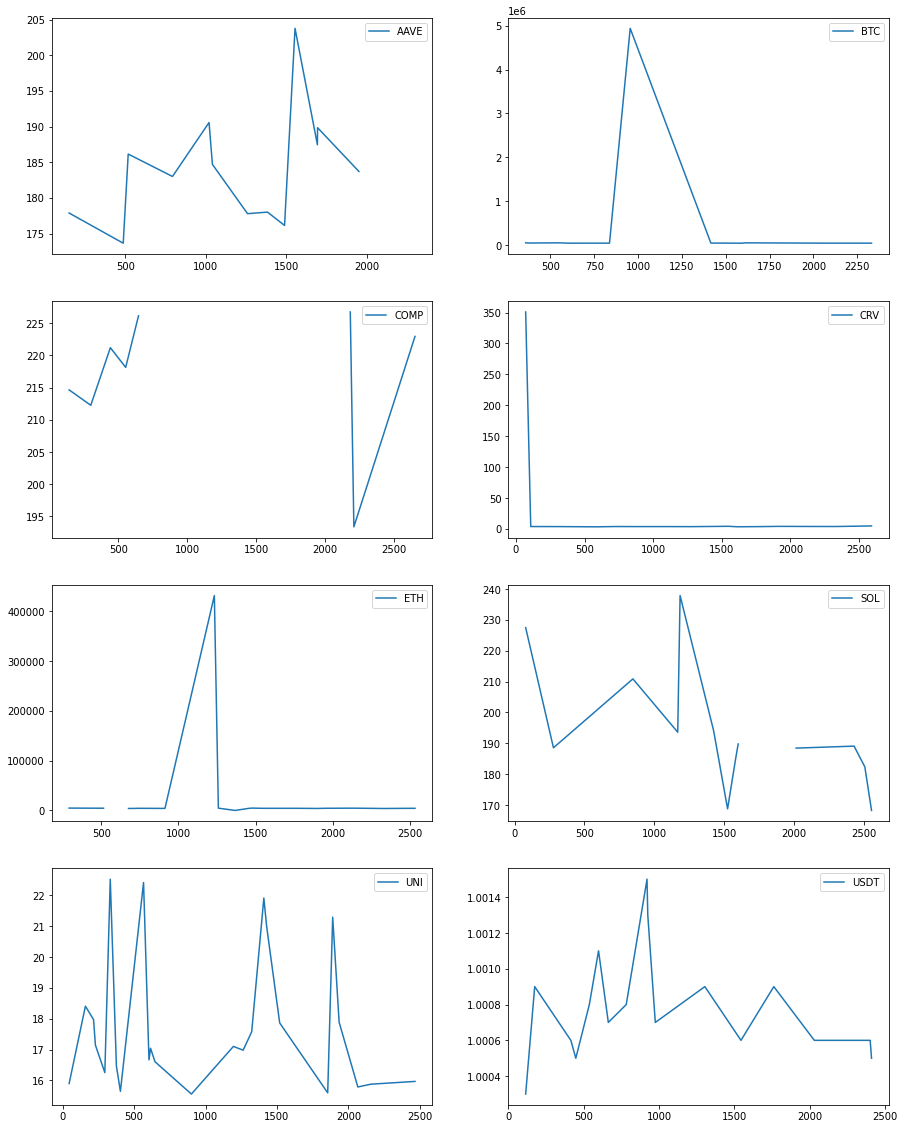

In [82]:
tokens_in_df = clean.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in clean[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [83]:
clean.loc[df['token'].str.contains('<a>'), 'token'] = clean.loc[df['token'].str.contains('<a>'), 'token'].str.extract('<a>(.|\n)*?<\/a>')

In [84]:
clean.loc[clean['close'].isnull(), 'close'] = 0.5 * (clean.loc[clean['close'].isnull(), 'high'] + clean.loc[clean['close'].isnull(), 'low'])

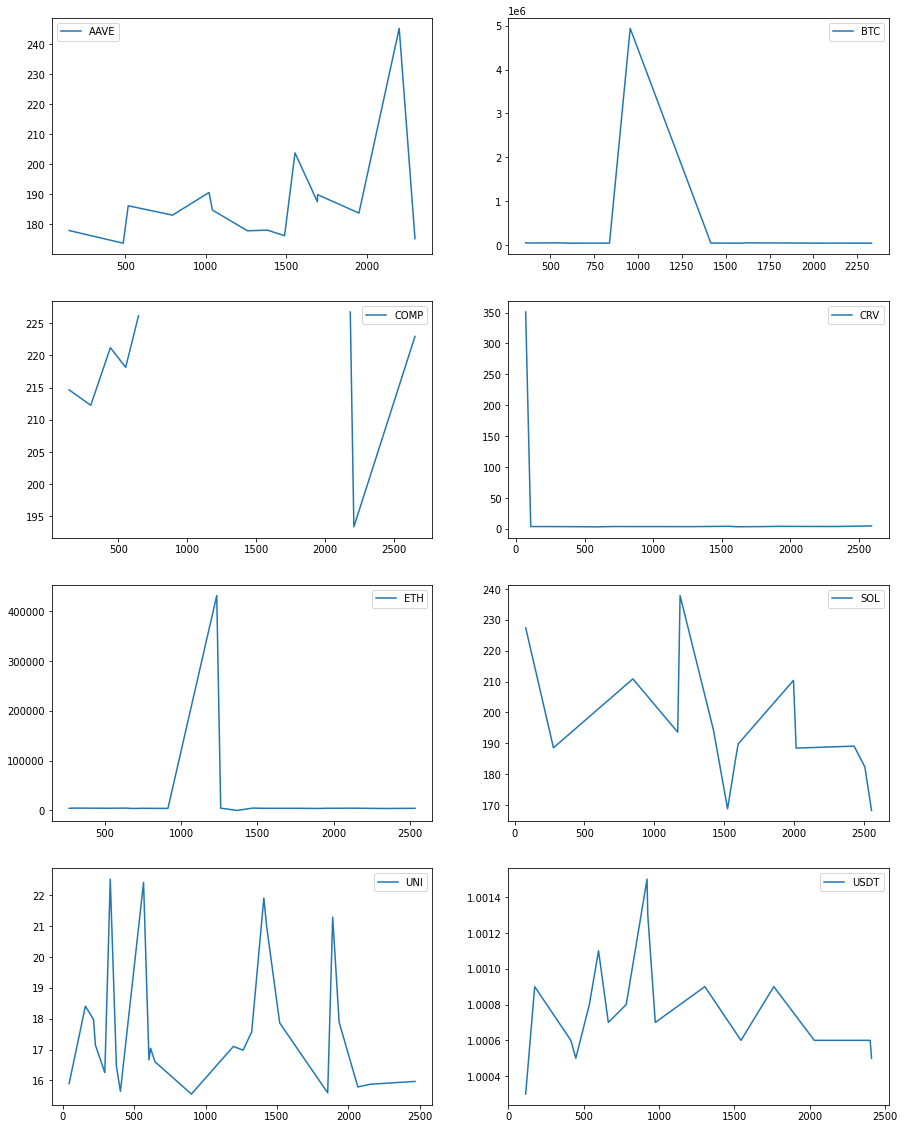

In [85]:
tokens_in_df = clean.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in clean[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [86]:
clean.loc[clean.close / clean.open >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain
71,2021-12-10 21:00:00,3.46,3.51,3.46,351.0,108024.480000,3.791659e+07,CRV,ETH
955,2021-12-05 11:00:00,49113.55,NaN,NaN,4936795.0,621.159777,3.066538e+09,BTC,BTC
1233,2021-12-09 13:00:00,4307.44,NaN,4268.88,431046.0,6367.062495,2.744497e+09,ETH,ETH


In [87]:
clean.loc[clean.close / clean.open >= 2].size

27

In [88]:
clean.loc[clean.close / clean.open >= 2, 'close'] = 0.5 * (clean.loc[clean.close / clean.open >= 2, 'high'] + clean.loc[clean.close / clean.open >= 2, 'low'])

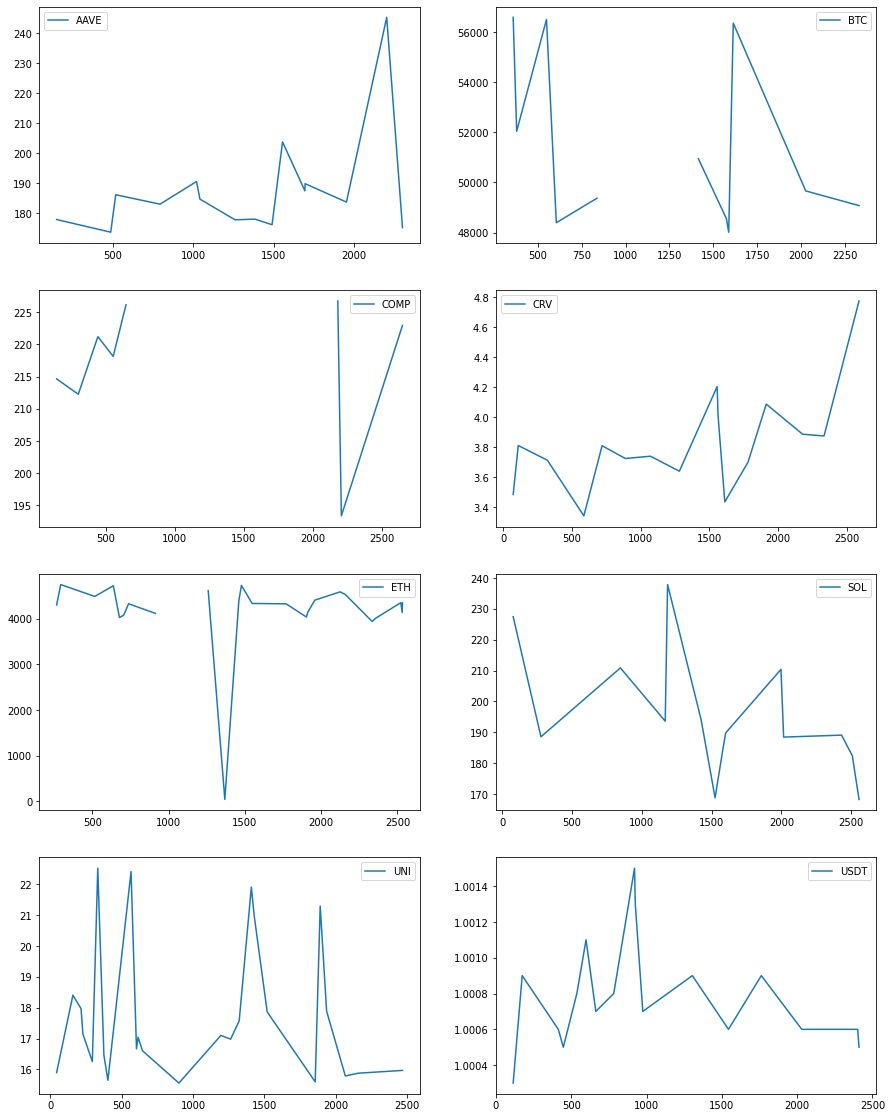

In [89]:
tokens_in_df = clean.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in clean[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [90]:
clean['volumeUSD']= clean['volume']* clean['close']

In [91]:
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,7.041235e+05,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,3.522644e+05,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,1.296734e+07,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,7.352023e+07,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,1.341009e+07,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,2.308318e+05,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,8.503920e+06,SOL,SOL
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,4.057011e+05,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,5.729636e+07,ETH,ETH


In [92]:
clean.groupby('chain')['volumeUSD'].sum()

chain
BTC     3.683078e+08
ETH     1.053495e+09
SOL     1.640449e+08
USDT    3.860680e+07
Name: volumeUSD, dtype: float64